# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [1]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 


<span style=color:red>**C'est quoi `Ep`?** </span>

In [2]:
L=50/100
Rw=30/100
Ep=1/100
print(L,Rw)

0.5 0.3


### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [3]:
def draw_wheelchair(x, y, theta):
  Square_x=[x+L*sin(theta)/2,x-L*sin(theta)/2,x+L*cos(theta)-L*sin(theta)/2,x+L*cos(theta)+L*sin(theta)/2,x+L*sin(theta)/2]
  Square_y=[y-L*cos(theta)/2,y+L*cos(theta)/2,y+L*cos(theta)/2+L*sin(theta),y+L*sin(theta)-L*cos(theta)/2,y-L*cos(theta)/2]
  Wheel_1_x=[x+L*sin(theta)/2+Ep*sin(theta)-Rw*cos(theta),x+L*sin(theta)/2-Rw*cos(theta)-Ep*sin(theta),x+L*sin(theta)/2+Rw*cos(theta)-Ep*sin(theta),
             x+L*sin(theta)/2+Rw*cos(theta)+Ep*sin(theta),x+L*sin(theta)/2+Ep*sin(theta)-Rw*cos(theta)]
  Wheel_1_y=[y-L*cos(theta)/2-Ep*cos(theta)-Rw*sin(theta),y-L*cos(theta)/2+Ep*cos(theta)-Rw*sin(theta),y-L*cos(theta)/2+Ep*cos(theta)+Rw*sin(theta),
             y-L*cos(theta)/2-Ep*cos(theta)+Rw*sin(theta),y-L*cos(theta)/2-Ep*cos(theta)-Rw*sin(theta)]

  Wheel_2_x=[x-L*sin(theta)/2+Ep*sin(theta)-Rw*cos(theta),x-L*sin(theta)/2-Rw*cos(theta)-Ep*sin(theta),x-L*sin(theta)/2+Rw*cos(theta)-Ep*sin(theta),
             x-L*sin(theta)/2+Rw*cos(theta)+Ep*sin(theta),x-L*sin(theta)/2+Ep*sin(theta)-Rw*cos(theta)]
  Wheel_2_y=[y+L*cos(theta)/2-Ep*cos(theta)-Rw*sin(theta),y+L*cos(theta)/2+Ep*cos(theta)-Rw*sin(theta),y+L*cos(theta)/2+Ep*cos(theta)+Rw*sin(theta),
             y+L*cos(theta)/2-Ep*cos(theta)+Rw*sin(theta),y+L*cos(theta)/2-Ep*cos(theta)-Rw*sin(theta)]

  plot(Square_x,Square_y,'b-')
  plot(Wheel_1_x,Wheel_1_y,'r-')
  plot(Wheel_2_x,Wheel_2_y,'r-')

 # plt.plot(xx, X_1, 'r-')
  #plt.plot(xx, X_2, 'g-')

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [4]:
def draw_arena(xmin=-5, xmax=5, ymin=-5, ymax=5):
  figure(figsize=(7,7))
  xlim(-5,5)
  ylim(-5,5)
  axes=gca()
  grid(True)
    

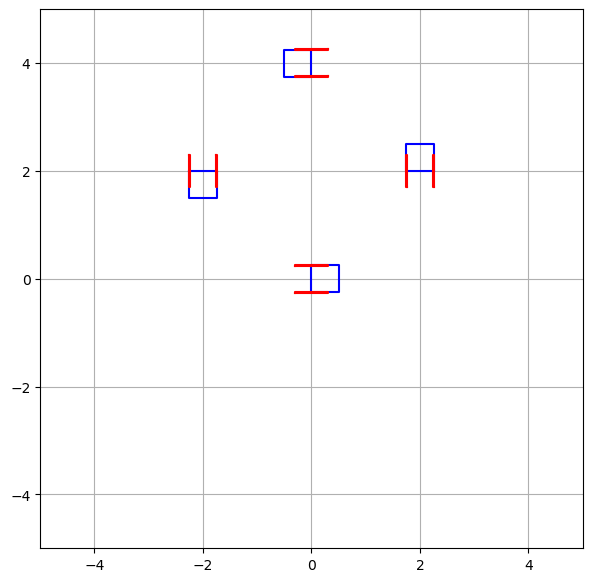

In [5]:
draw_arena()
draw_wheelchair(0,0,0)
draw_wheelchair(2,2,pi/2)
draw_wheelchair(0,4,pi)
draw_wheelchair(-2,2,1.5*pi)
show()

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

V = (Vl + Vr) / 2,

where Vl and Vr are the linear velocities of the left and right wheels, respectively. We can compute Vl and Vr as follows:

Vl = ωl * Rw
Vr = ωr * Rw

The linear velocity of the center of the wheelchair (even the back of the wheelchair) can be decomposed into its horizontal and vertical components, Vx and Vy, respectively:

Vx = V * cos(θ)
Vy = V * sin(θ)

Therefore, we have:

x˙ = Vx = V * cos(θ) = (Rw/2) * (ωl + ωr) * cos(θ)

y˙ = Vy = V * sin(θ) = (Rw/2) * (ωl + ωr) * sin(θ)

θ˙ = (Rw/L) * (ωr - ωl)

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:**
Assuming that $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x,y,\theta)$, the system of differential equations can be written as:


x˙ = (Rw/2) * (ωl + ωr) * cos(θ)

y˙  = (Rw/2) * (ωl + ωr) * sin(θ)

θ˙ = (Rw/L) * (ωr - ωl)

This system of differential equations is a first-order autonomous system of ordinary differential equations. So this system has a unique solution for any initial condition $(x_0, y_0, \theta_0)$. Therefore, the system is well-posed.<span style=color:red>**Non, il ne s'agit pas du bon argument (il fallait dire que le champ de vecteur est continument différentiable)** </span>

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**
If $\omega_l$ and $\omega_r$ are constants, the solution to the system of differential equations is:

x(t) = $x_0$ + (Rw/2) * ($\omega_l$ + $\omega_r$) * cos($θ_0$t)

y(t) = $y_0$ + (Rw/2) * ($\omega_l$ + $\omega_r$) * sin($θ_0$t)

θ˙ = (Rw/L) * ($\omega_r$ - $\omega_l$)*t

<span style=color:red>**La résolution ci-dessus n'est pas bonne... De plus, quelle est la conclusion de votre raisonnement?**</span>


If $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x,y,\theta)$, then the system of differential equations is a first-order system of ordinary differential equations. 

This system has a unique solution for any initial condition $(x_0, y_0, \theta_0)$. However, it is not necessarily true that the maximal solution associated to any initial state is global, considering the behavior of the functions $\omega_l$ and $\omega_r$. 

Therefore, the system may not be well-posed.
<span style=color:red>**Le système reste toujours bien posé tant que $\omega_l$ et $\omega_r$ sont continument différentiables (votre conclusion est fausse et ne correspond pas à la question posée). Par contre, la solution peut ne pas être globale en fonction de la forme de ces fonctions... (ce que vous dites plus haut est effectivement vrai)**</span>

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [6]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])
'''def omega(dx,dy,dtheta):
    wr=dtheta*L/(2*Rw)+(sqrt(dx*dx+dy*dy)/Rw)
    wl=-dtheta*L/(2*Rw)+(sqrt(dx*dx+dy*dy)/Rw)
    return(wr,wl)
omega(0,0,0)'''
print(omega(0,[0,0,0]))

[ 9.16297857 11.78097245]


🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [7]:
def fun(t, xytheta):
    x,y,theta=xytheta
    wl=omega(t,xytheta)[0]
    wr=omega(t,xytheta)[1]
    dx=Rw*(wl+wr)*cos(theta)/2
    dy=Rw*(wl+wr)*sin(theta)/2
    dtheta=Rw*(wr-wl)/L
    return(dx,dy,dtheta)
fun(3,[1,2,2])

(-1.307363844511135, 2.856642116043664, 1.5707963267948968)

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)

<span style=color:red>**C'est dommage d'utiliser un `max_step`... Ce n'est pas forcément nécessaire (mais ça peut générer de nombreux calculs inutiles). Si le but est d'avoir plein de points à tracer, il vaut mieux passer par la sortie dense. Si le but est d'améliorer la précision, il vaut mieux jouer sur les tolérances...**</span>

In [8]:
from scipy.integrate import solve_ivp
solved = solve_ivp(fun, [0.0, 4], [0,0,0],max_step=0.2, dense_output=True)


🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.
<span style=color:red>**Dommage de ne pas utiliser la sortie dense dans votre code. Si on enlève le `max_step` précédent, vos courbes deviendraient affreuses (trop peu de points) alors qu'en `dense_output`, la solution a une "bonne tête"**</span>

/var/folders/_5/q19bv6mj3nv_m_7v20nw_k480000gn/T/ipykernel_46679/218688769.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plot(solved["t"], solved["y"][0], "k",color='green',label=r'$x(t)$')
/var/folders/_5/q19bv6mj3nv_m_7v20nw_k480000gn/T/ipykernel_46679/218688769.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plot(solved["t"], solved["y"][1], "k",color='red',label=r'$y(t)$')
/var/folders/_5/q19bv6mj3nv_m_7v20nw_k480000gn/T/ipykernel_46679/218688769.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plot(solved["t"], solved["y"][2], "k",color='yellow',label=r'$theta(t)$')


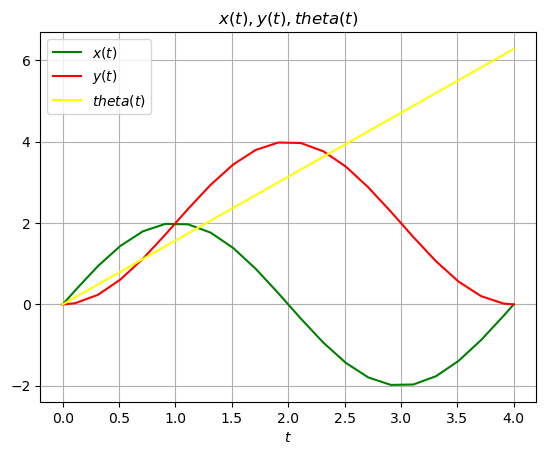

In [9]:
'''plt.plot(Simul(4)[0], Simul(4)[1],color='blue',label=r'$x(t)$')
plt.plot(Simul(4)[0], Simul(4)[2],color='yellow',label=r'$y(t)$')
plt.plot(Simul(4)[0], Simul(4)[3],color='red',label=r'$theta(t)$')
plt.grid(True); xlabel("$t$"); title("$x(t), y(t), theta(t)$")
plt.legend()'''
plot(solved["t"], solved["y"][0], "k",color='green',label=r'$x(t)$')
plot(solved["t"], solved["y"][1], "k",color='red',label=r'$y(t)$')
plot(solved["t"], solved["y"][2], "k",color='yellow',label=r'$theta(t)$')
grid(True); xlabel("$t$"); title("$x(t), y(t), theta(t)$")
legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

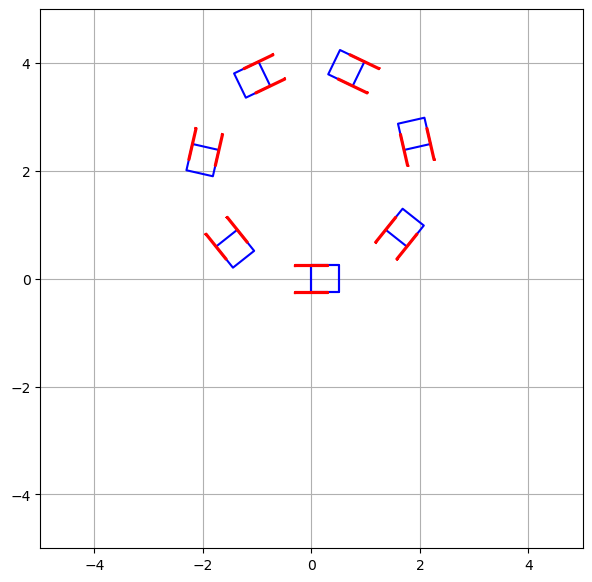

In [10]:

T=linspace(0,4,8)
trajectoire=solved["sol"](T)
draw_arena()
for x, y, theta in trajectoire.T:
  draw_wheelchair(x,y,theta)


🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

x(t)=2*sin(pi*t/2) ;
y(t)=-2*cos(pi*t/2)+2 ;
theta(t)=(pi/2)*t

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.
<span style=color:red>**Votre erreur est déjà faible à cause du `max_step` précédent. Sans `max_step`, elle est de l'ordre de $10^{-2}$, ce qui motive l'ajustement des tolérances.**</span>

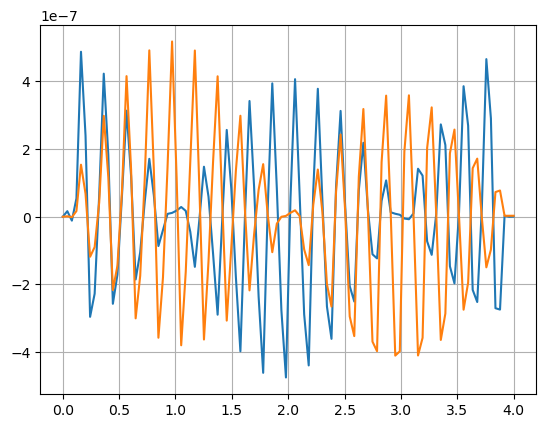

In [11]:
T=linspace(0,4,100)
x,y,theta=solved["sol"](T)
plot(T,x-2*sin(pi*T/2),label="$erreur de x(t)")
plot(T,y+2*cos(pi*T/2)-2,label="$erreur de x(t)")
grid()

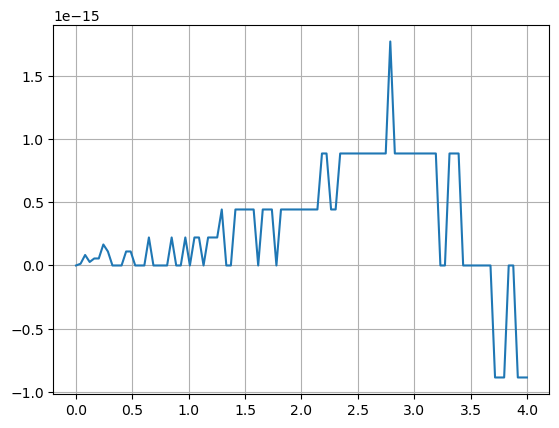

In [12]:
plot(T,theta-pi*T/2,label="$erreur de x(t)")
grid()

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

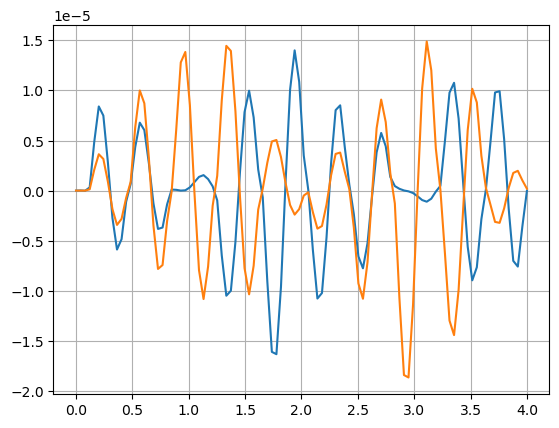

In [13]:
solved = solve_ivp(fun=fun, t_span =(0.0, 4.0), y0=[0.0, 0.0, 0.0], rtol=5e-7, dense_output=True)
T=linspace(0,4,100)
x,y,theta=solved["sol"](T)
plot(T,x-2*sin(pi*T/2),label="$erreur de x(t)")
plot(T,y+2*cos(pi*T/2)-2,label="$erreur de x(t)")
grid()

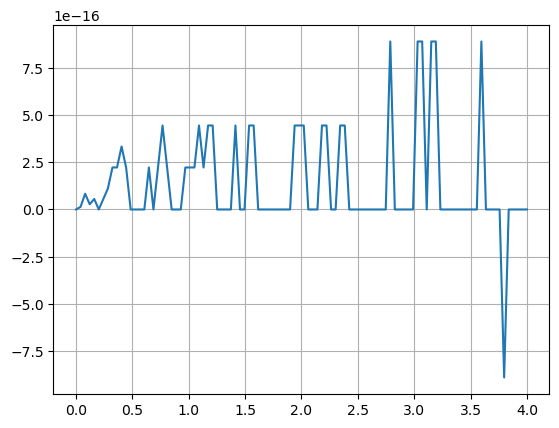

In [14]:
plot(T,theta-pi*T/2,label="$erreur de x(t)")
grid()